In [25]:
from EyeNet import EyeNet
import matplotlib.pyplot as plt
from preprocess import IrisPreprocessor
from test import test
import torch
from torch.utils.data import DataLoader
from train import train

In [26]:
image_dir = "data/images/"
labels_dir = "data/labels/"

preprocessor = IrisPreprocessor(labels_dir=labels_dir, image_dir=image_dir)
trainset, testset = preprocessor.preprocess(visualize_flag=False)

train_loader = DataLoader(trainset, batch_size=20)
test_loader = DataLoader(testset, batch_size=20)

In [34]:
net = EyeNet(torch.nn.modules.activation.ReLU)

In [35]:
model = train(
                model=net,
                epochs=100,
                train_dataloader=train_loader,
                optimizer=torch.optim.SGD(net.parameters(), lr=1e-3),
                base_loss_function=torch.nn.MSELoss(),
                aux_loss_function=torch.nn.L1Loss(),
            )
torch.save(model.state_dict(), "model.pt")

In [36]:
test_loss = test(model, test_loader, torch.nn.MSELoss(), torch.nn.L1Loss())
print(test_loss)

6.830211490392685


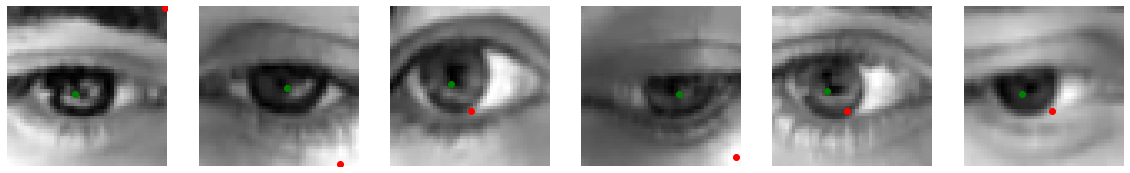

In [37]:
images = []
labels = []
for i in range(3):
    temp_images, temp_labels = iter(test_loader).next()
    images += temp_images 
    labels += temp_labels

fig, axs = plt.subplots(1, 6)
fig.set_size_inches(20,10)
for i in range(6):
    axs[i].imshow(images[i].permute(1,2,0), cmap='gray')
    axs[i].scatter(images[i].squeeze(dim=0).argmax().item() // 48, images[i].squeeze(dim=0).argmax().item() % 48, c='red')
    axs[i].scatter(labels[i].squeeze(dim=0).argmax().item() // 48, labels[i].squeeze(dim=0).argmax().item() % 48, c='green')
    axs[i].axis('off')